<a href="https://colab.research.google.com/github/Mayshro/K-Mean_Project/blob/main/K_MeanProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Unsupervised Project/K-Mean Project/employee-compensation.csv")

In [ ]:
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683277 entries, 0 to 683276
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  683277 non-null  int64  
 1   Job Family Code          683277 non-null  object 
 2   Job Code                 683277 non-null  object 
 3   Year Type                683277 non-null  object 
 4   Year                     683277 non-null  int64  
 5   Organization Group       683277 non-null  object 
 6   Department Code          683275 non-null  object 
 7   Department               683275 non-null  object 
 8   Union Code               682926 non-null  float64
 9   Union                    682926 non-null  object 
 10  Job Family               683277 non-null  object 
 11  Job                      683272 non-null  object 
 12  Employee Identifier      683277 non-null  int64  
 13  Salaries                 683277 non-null  float64
 14  Over

In [ ]:
df.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,683277.000000,683277.000000,682926.000000,6.832770e+05,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000
mean,2.977943,2016.364632,492.532173,1.708711e+07,69466.271313,5474.598046,3820.481201,78571.040544,13658.900273,9946.864621,5038.753940,28644.518833,107215.559377
std,1.579574,2.092180,330.911187,1.925902e+07,47771.799981,13110.029734,8386.602694,55751.218659,10110.075388,5732.982236,3787.981426,17869.713199,72291.710218
min,1.000000,2013.000000,1.000000,0.000000e+00,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,2.000000,2015.000000,250.000000,2.545000e+04,29009.540000,0.000000,0.000000,31676.040000,4662.960000,4780.680000,1870.410000,11716.230000,44439.440000
50%,2.000000,2017.000000,535.000000,5.097500e+04,67899.360000,0.000000,706.240000,74870.420000,13858.160000,12500.590000,4876.550000,32521.370000,107529.240000
75%,4.000000,2018.000000,790.000000,3.737703e+07,100416.890000,4223.390000,4362.880000,112666.100000,20151.850000,14037.160000,7525.560000,40915.930000,154170.540000
max,7.000000,2020.000000,990.000000,4.434643e+07,651936.710000,321523.310000,568163.120000,658867.570000,121952.520000,59405.230000,36815.390000,151645.180000,807625.250000


In [ ]:
#Identifing missing Values
miss_val = df.isna().sum()
miss_val

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

As per my Analysis the following columns doesnt contribute in proper clustering of the data

In [ ]:
df=df.drop(['Union Code','Union','Department','Department Code','Job'],axis=1)

In [ ]:
df.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Job Family                  object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

dropping object data type columns

In [ ]:
# df=df.drop(['Job Code','Year Type','Employee Identifier','Job Family','Organization Group Code','Organization Group','Job Family Code'],axis=1)
df = df.select_dtypes(exclude = 'object')

In [ ]:
# df=df.drop('Year',axis=1)

In [ ]:
df.dtypes

Organization Group Code      int64
Year                         int64
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

In [ ]:
df.columns

Index(['Organization Group Code', 'Year', 'Employee Identifier', 'Salaries',
       'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

In [ ]:
# Showing overview of the dataset
df.head()

,Organization Group Code,Year,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,2013,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,2013,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,2013,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,2013,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,2013,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [ ]:
# Plot distribution of each feature variable
# note insights

(array([7.00000e+00, 1.20000e+01, 7.80000e+01, 1.33700e+05, 4.53600e+04,
        3.71210e+04, 3.98130e+04, 1.17222e+05, 1.39996e+05, 9.36730e+04,
        4.16430e+04, 1.86890e+04, 9.46400e+03, 4.02200e+03, 1.51900e+03,
        5.68000e+02, 2.28000e+02, 8.10000e+01, 2.90000e+01, 1.70000e+01,
        1.20000e+01, 8.00000e+00, 6.00000e+00, 6.00000e+00, 3.00000e+00]),
 array([-21295.15  , -14377.5368,  -7459.9236,   -542.3104,   6375.3028,
         13292.916 ,  20210.5292,  27128.1424,  34045.7556,  40963.3688,
         47880.982 ,  54798.5952,  61716.2084,  68633.8216,  75551.4348,
         82469.048 ,  89386.6612,  96304.2744, 103221.8876, 110139.5008,
        117057.114 , 123974.7272, 130892.3404, 137809.9536, 144727.5668,
        151645.18  ]),
 <a list of 25 Patch objects>)

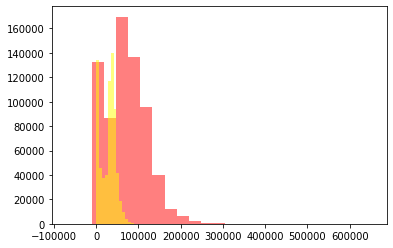

In [ ]:

plt.hist(df['Salaries'], bins = 25, alpha = 0.5, color ='red')
plt.hist(df['Total Benefits'], bins = 25, alpha = 0.5, color ='yellow')



Insights:
Total benefits have been provided and the ratios is 1:5 compared to Total Salary

Pairplot to understand relationships between each pair of features

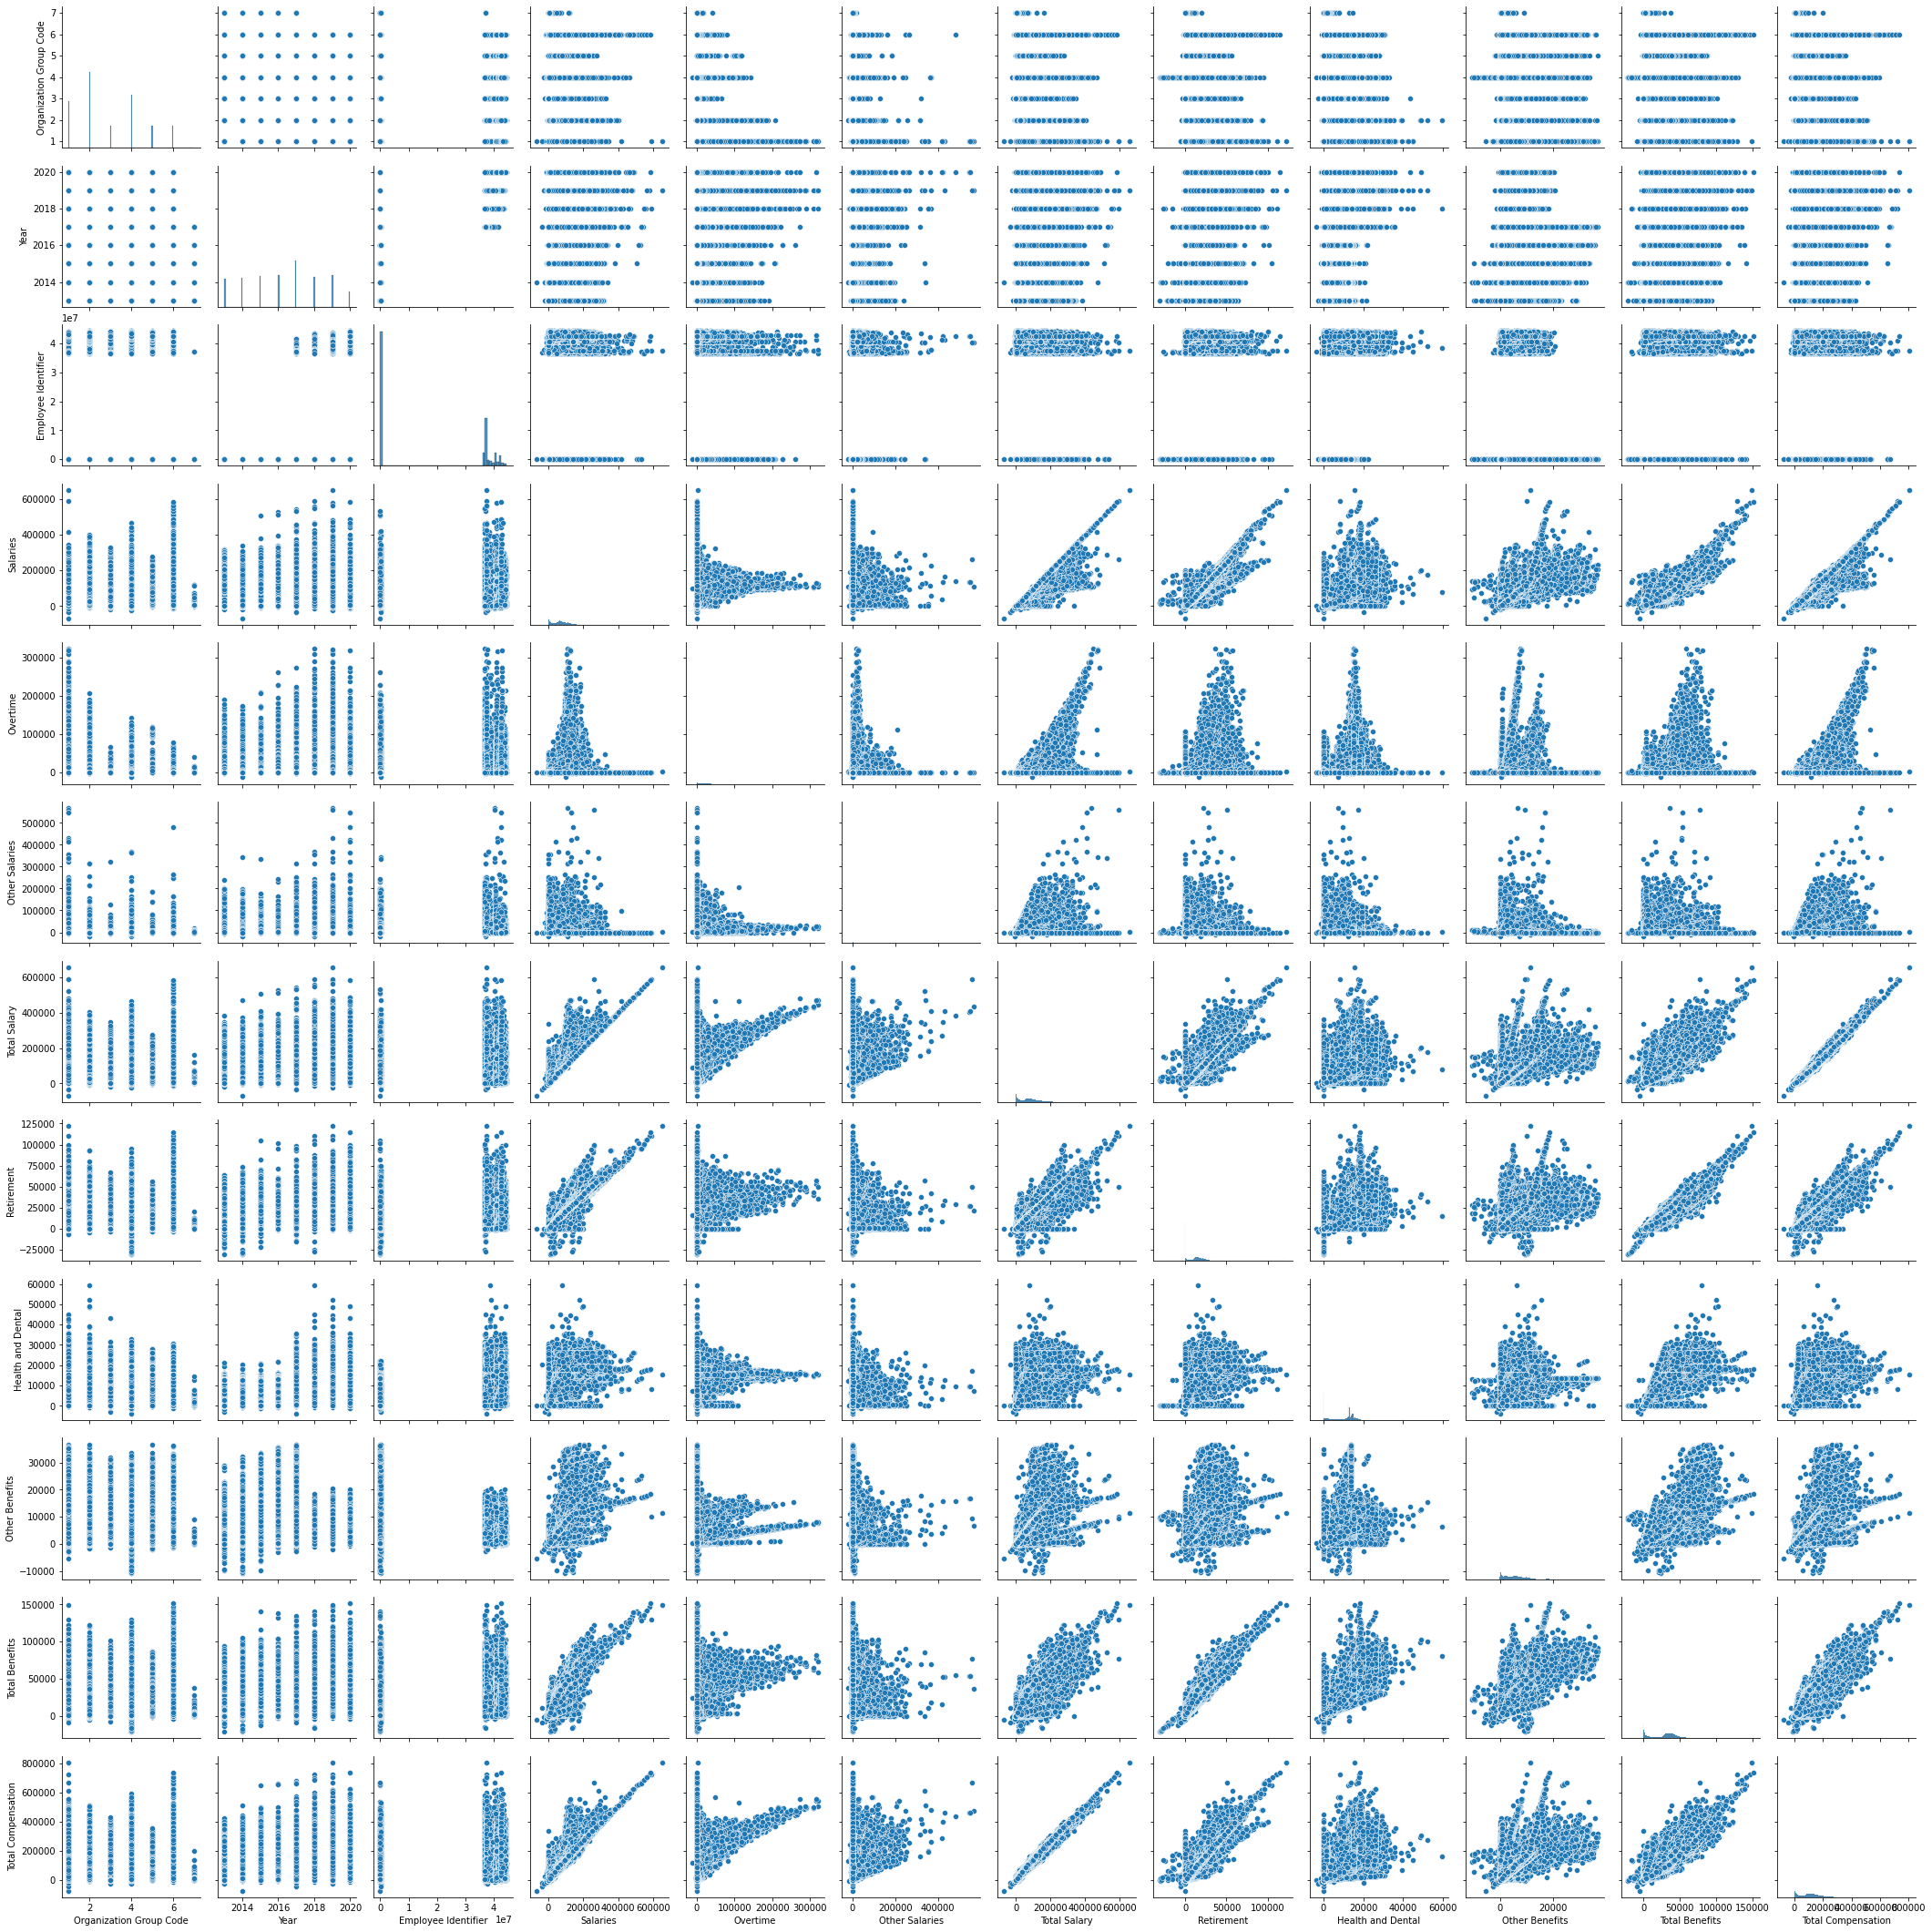

In [ ]:
#sns.pairplot(df)

In [ ]:
#Constructing correlation Matrix
corr = df.corr()
corr

,Organization Group Code,Year,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
Organization Group Code,1.000000,-0.000707,-0.000483,-0.192644,-0.297225,-0.199240,-0.264133,-0.234457,-0.226974,0.032476,-0.198581,-0.252786
Year,-0.000707,1.000000,0.838653,0.125284,0.080808,0.006865,0.124137,0.100216,0.161185,0.102326,0.130101,0.127894
Employee Identifier,-0.000483,0.838653,1.000000,0.130882,0.081802,0.007155,0.128645,0.103993,0.174044,0.094587,0.134723,0.132513
Salaries,-0.192644,0.125284,0.130882,1.000000,0.259388,0.256029,0.957367,0.947414,0.758175,0.727234,0.933410,0.969048
Overtime,-0.297225,0.080808,0.081802,0.259388,1.000000,0.291799,0.501886,0.311104,0.299804,0.091990,0.291696,0.459157
Other Salaries,-0.199240,0.006865,0.007155,0.256029,0.291799,1.000000,0.415493,0.279956,0.155871,0.051601,0.219334,0.374644
Total Salary,-0.264133,0.124137,0.128645,0.957367,0.501886,0.415493,1.000000,0.928071,0.745430,0.653085,0.902661,0.994326
Retirement,-0.234457,0.100216,0.103993,0.947414,0.311104,0.279956,0.928071,1.000000,0.782788,0.677955,0.960612,0.953180
Health and Dental,-0.226974,0.161185,0.174044,0.758175,0.299804,0.155871,0.745430,0.782788,1.000000,0.626897,0.896584,0.796500
Other Benefits,0.032476,0.102326,0.094587,0.727234,0.091990,0.051601,0.653085,0.677955,0.626897,1.000000,0.796664,0.700585


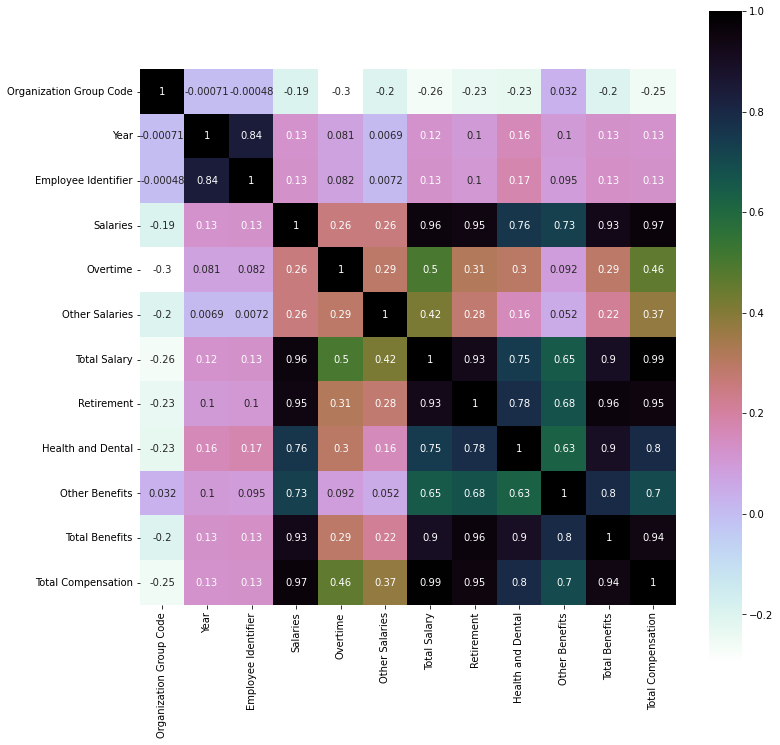

In [ ]:
#heatmap 
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [ ]:
# Insights about the features:
# Pairwise relationships


Clustering on the basis of **Salaries** and **Total Benefits**

In [ ]:
#Feature selection for the model
#considering ony 2 features (Salaries and Total Benefits) and no label available
X= df.iloc[:, [3,4]].values

K Means Cluster Creation

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

Create an instance of a K Means model with 2 clusters

In [ ]:
# Kmeans=KMeans(n_clusters=2)

Building KMeans models with no. of clusters = 1 to 10

In [ ]:
for i in range(1,11):
  Kmeans = KMeans(n_clusters=i)
  Kmeans.fit(X)
  wcss.append(Kmeans.inertia_)
  # inertia is the formula used to segregate the data points into clusters

Using ELBOW method to get the optimal value of K

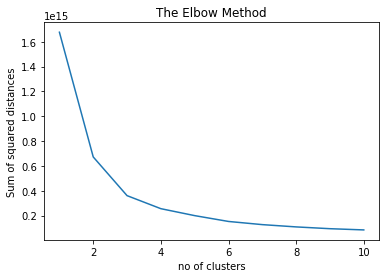

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('Sum of squared distances') #sum of squared distances of each data points in all clusters to their respective centroids
plt.show()

Model Build

In [ ]:
# function for clustering
def cluster(no_of_clusters,cols):
  km = KMeans(n_clusters= no_of_clusters)
  print(f"Clustering with no_of_clusters with cols :{list(cols)}")

  pred = km.fit_predict(df[cols])
  df_new = df[cols]
  df_new['Cluster_number'] = pred
  return df_new


In [ ]:
# on the basis of elbow method, checking clustering with no_of_clusters  = 3
prediction = cluster(3,['Salaries','Total Benefits'])

Clustering with no_of_clusters with cols :['Salaries', 'Total Benefits']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


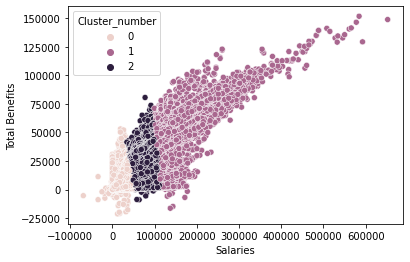

In [ ]:
# Visualizing the clustering
sns.scatterplot('Salaries','Total Benefits',hue = 'Cluster_number',data = prediction)